## Imports

In [1]:
%matplotlib notebook

import os, sys, datetime
import matplotlib.pyplot as plt
import numpy as np

#sys.path.append(r"D:\Code")
import qcodes as qc
# import characterizations.characterizations.mobility as mobility
from qcodes.dataset.data_set import DataSet, load_by_id
from qcodes.dataset.experiment_container import Experiment
import numpy as np
import scipy as sp
import scipy.optimize as spo
import matplotlib.pyplot as plt

from qcodes.dataset.database import initialise_database, get_DB_location

qc.config["core"]["db_location"] = r'D:\OneDrive\BF3\Data\experiments_2018-10.db'
initialise_database()

## B field stability plots

<IPython.core.display.Javascript object>


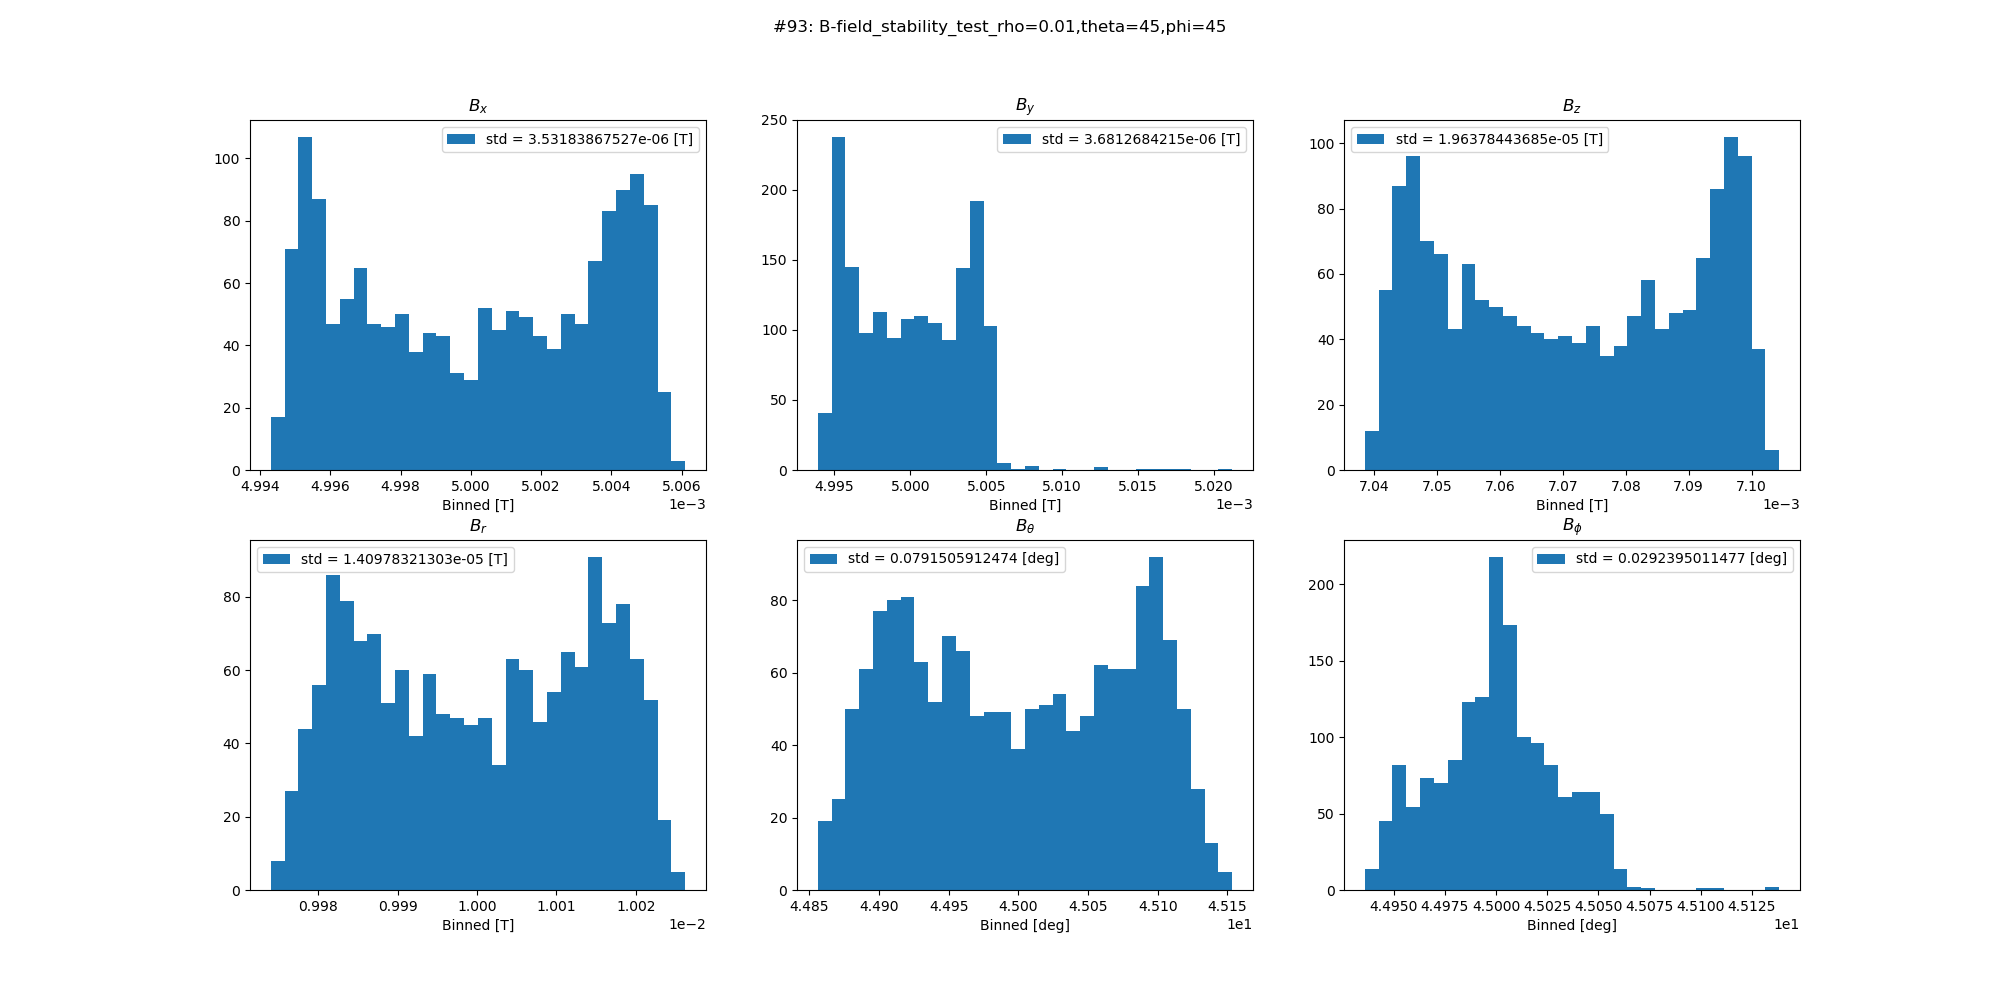

In [92]:
runid = 93;
dat = load_by_id(runid)
exp = Experiment(dat.path_to_db)
exp.exp_id = dat.exp_id
# dat.exp_name = exp.name

p = dat.get_values('datapoint')
time_Bxyz = dat.get_values('meas_time_Bxyz')
time_Brtp = dat.get_values('meas_time_Brtp')
B_x = dat.get_values('B_x')
B_y = dat.get_values('B_y')
B_z = dat.get_values('B_z')
B_r = dat.get_values('B_r')
B_theta = dat.get_values('B_theta')
B_phi = dat.get_values('B_phi')

datasets = [['$B_x$', B_x, 'T'], ['$B_y$', B_y, 'T'], ['$B_z$', B_z, 'T'], ['$B_r$', B_r, 'T'], ['$B_\\theta$', B_theta, 'deg'], ['$B_\\phi$', B_phi, 'deg']];

plt.figure('B-hists', figsize=(20, 10))
plt.suptitle('#' + str(runid) + ': ' + dat.exp_name)
for i in range(0, len(datasets)):
    plt.subplot(2, 3, i+1)
    a = np.hstack(np.array(datasets[i][1]))
    plt.hist(a, bins=30)
    plt.title(datasets[i][0])
    plt.xlabel('Binned ['+datasets[i][2]+']')
    plt.legend(['std = ' + str(np.std(datasets[i][1])) + ' ['+datasets[i][2]+']'])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## FFT

<IPython.core.display.Javascript object>


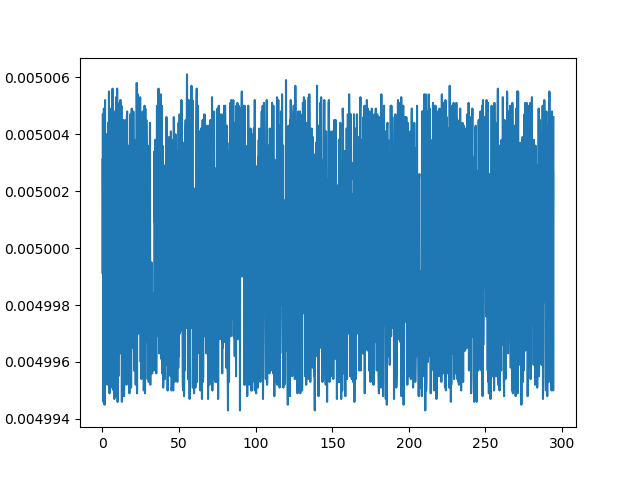

In [231]:
runid = 93;
dat = load_by_id(runid)
exp = Experiment(dat.path_to_db)
exp.exp_id = dat.exp_id
# dat.exp_name = exp.name

p = dat.get_values('datapoint')
time_Bxyz = np.array(dat.get_values('meas_time_Bxyz')).reshape(-1)
time_Brtp = np.array(dat.get_values('meas_time_Brtp')).reshape(-1)
B_x = np.array(dat.get_values('B_x')).reshape(-1)
B_y = np.array(dat.get_values('B_y')).reshape(-1)
B_z = np.array(dat.get_values('B_z')).reshape(-1)
B_r = np.array(dat.get_values('B_r')).reshape(-1)
B_theta = np.array(dat.get_values('B_theta')).reshape(-1)
B_phi = np.array(dat.get_values('B_phi')).reshape(-1)

time_total_Bxyz = np.cumsum(time_Bxyz)
time_total_Brtp = np.cumsum(time_Brtp)

time_interp = [0.2*i for i in range(0, len(B_x))]
B_x_interp = np.interp(time_interp, time_total_Bxyz, B_x)

fft = np.fft.fft(B_x_interp)
plt.figure('fft')
plt.plot(time_total_Bxyz, B_x)

<IPython.core.display.Javascript object>


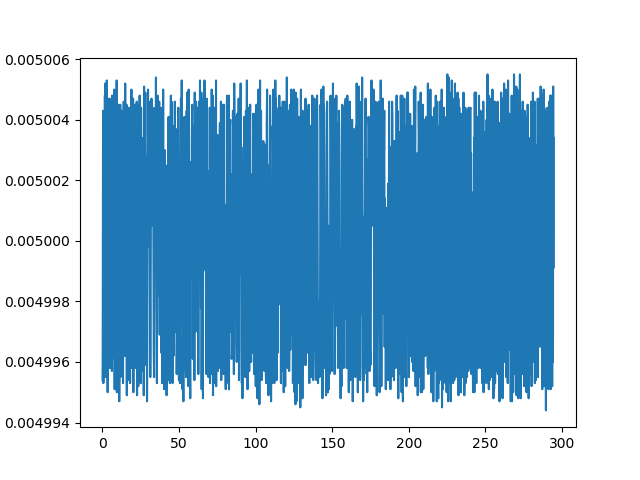

In [230]:
runid = 95;
dat = load_by_id(runid)
exp = Experiment(dat.path_to_db)
exp.exp_id = dat.exp_id
# dat.exp_name = exp.name

p = dat.get_values('datapoint')
# time_Bxyz = np.array(dat.get_values('meas_time_Bxyz')).reshape(-1)
# time_Brtp = np.array(dat.get_values('meas_time_Brtp')).reshape(-1)
time_Bx = np.array(dat.get_values('meas_time_Bx')).reshape(-1)
B_x = np.array(dat.get_values('B_x')).reshape(-1)
# B_y = np.array(dat.get_values('B_y')).reshape(-1)
# B_z = np.array(dat.get_values('B_z')).reshape(-1)
# B_r = np.array(dat.get_values('B_r')).reshape(-1)
# B_theta = np.array(dat.get_values('B_theta')).reshape(-1)
# B_phi = np.array(dat.get_values('B_phi')).reshape(-1)

time_total = np.cumsum(time_Bx)

time_interp = np.linspace(min(time_total), max(time_total), len(time_total));
B_x_interp = np.interp(time_interp, time_total_Bxyz, B_x)

fft = np.fft.fft(B_x_interp)
plt.figure('fft_2')
plt.plot(time_total_Bxyz, B_x)

## Playground

<IPython.core.display.Javascript object>


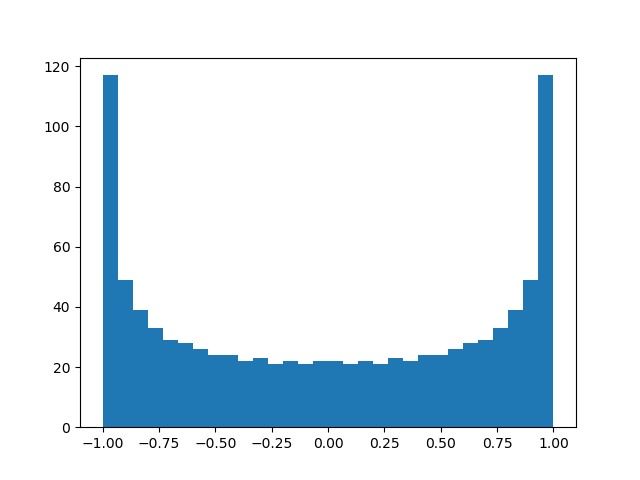

(array([ 117.,   49.,   39.,   33.,   29.,   28.,   26.,   24.,   24.,
          22.,   23.,   21.,   22.,   21.,   22.,   22.,   21.,   22.,
          21.,   23.,   22.,   24.,   24.,   26.,   28.,   29.,   33.,
          39.,   49.,  117.]),
 array([-0.99999876, -0.93333218, -0.8666656 , -0.79999901, -0.73333243,
        -0.66666584, -0.59999926, -0.53333267, -0.46666609, -0.39999951,
        -0.33333292, -0.26666634, -0.19999975, -0.13333317, -0.06666658,
         0.        ,  0.06666658,  0.13333317,  0.19999975,  0.26666634,
         0.33333292,  0.39999951,  0.46666609,  0.53333267,  0.59999926,
         0.66666584,  0.73333243,  0.79999901,  0.8666656 ,  0.93333218,
         0.99999876]),
 <a list of 30 Patch objects>)

In [241]:
x = np.linspace(0, 10 * 2*np.pi, 1000)
y = np.sin(x)

plt.figure('sine_hist')
plt.hist(y, bins=30)